# 1. Abstract
- In this project, our main goal is to predict the loan deliquency given the attributes of each loan, and show which attributes contribute most to predict the status of loan. For this purpose, we will use different classification models - logistic regression, decision tree, random forest and xgboost. By comparing metrics including the training and test accuracy, and AUROC score, we select logistic regression / decision tree with 85% accuracy and 63% AUROC score.

# 2. Introduction
- Credit and loan, they play a significant role in our modern society. They are the fundamental resource to enable us access essential items for our living. for example, buy food using credit card. Meanwhile support pursuing better life, such as loan for a car or mortgage for a house. At the same time, Loan business is absolutely the core unit for all financial institutions. However, there is always a risk that the debt could end-up-with charged off status and the bank may not get planned interest, fees, even lose the principle. In order to avoid this kind of situation, meanwhile not over-react- meaning super cautious, Banks are eager to find out a robust methodology to effectively evaluate necessary profiles from applicants. The ultimate goal of our project is to build a model with several learning algorithms applied. And the model is expected to be the good guideline for financial institutions to evaluate applicants.

# 3. Exploratory Data Analysis

In [1]:
import sklearn
print (sklearn.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print (sns.__version__)

pd.set_option('display.float_format',lambda x : '%.2f' % x)     # avoid exponential

0.23.2
0.11.0


In [2]:
loan_eda = pd.read_csv('credit_train.csv')

print (loan_eda.head())

print ('-'*60)
print (loan_eda.shape)

print ('-'*60)
print (loan_eda.dtypes)

                                Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid            445412.00  Short Term        709.00     1167493.00   
1  Fully Paid            262328.00  Short Term           nan            nan   
2  Fully Paid          99999999.00  Short Term        741.00     2231892.00   
3  Fully Paid            347666.00   Long Term        721.00      806949.00   
4  Fully Paid            176220.00  Short Term           nan            nan   

  Years in current job Home Ownership 

- The Dataset is collected from Kaggle.
- There are in total 100,514 records and 19 columns. It contains 7 categorical variables and 12 numerical variables.
- This is the statistical summary of the data.

In [3]:
loan_eda.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


In [4]:
loan_eda.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


In [5]:
target = 'Loan Status'
print (f'Target variable is {target}.')
print ('-'*60)


categorical_attributes = loan_eda.dtypes[loan_eda.dtypes == object].to_frame().index.tolist()
categorical_attributes.remove(target)
print ('Categorical Attributes: ')
print (*categorical_attributes, sep='||')
print ('Number of Categorical Attributes:', len(categorical_attributes))
print ('-'*60)

numeric_attributes = loan_eda.dtypes[loan_eda.dtypes != object].to_frame().index.tolist()
print ('Numeric Attributes: ')
print (*numeric_attributes, sep='||')
print ('-'*60)
print ('Number of Numeric Attributes:', len(numeric_attributes))

Target variable is Loan Status.
------------------------------------------------------------
Categorical Attributes: 
Loan ID||Customer ID||Term||Years in current job||Home Ownership||Purpose
Number of Categorical Attributes: 6
------------------------------------------------------------
Numeric Attributes: 
Current Loan Amount||Credit Score||Annual Income||Monthly Debt||Years of Credit History||Months since last delinquent||Number of Open Accounts||Number of Credit Problems||Current Credit Balance||Maximum Open Credit||Bankruptcies||Tax Liens
------------------------------------------------------------
Number of Numeric Attributes: 12


- Loan Status is the outcome variable. Both categorical attributes and numeric attributes are explanatory variables.

In [6]:
drop_list = ['Loan ID', 'Customer ID']
print ('Shape before dropping:', loan_eda.shape)

loan_eda.drop(drop_list, axis=1, inplace=True)
print ('Shape after dropping:', loan_eda.shape)

Shape before dropping: (100514, 19)
Shape after dropping: (100514, 17)


- Loan ID and Customer ID are coming first. Since they are not part of our interest, we just drop these two columns. So, 17 columns remained.

In [7]:
d = {'Variables': ['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Years in current job','Home ownership', 
                  'Purpose', 'Monthly debt', 'Years in credit history', 'Months since last delinquent', 'Number of Open Accounts',
                  'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens' ], 
     'Types':['Categorical', 'Numeric', 'Categorical', 'Numeric', 'Numeric', 'Numeric', 'Categorical', 'Categorical', 'Numeric', 'Numeric',
             'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Categorical', 'Categorical'], 
     'Descriptions': ['Current status of the loan', 'The current listed amount of the loan applied for by the borrower',
                     'The number of payments on the loan. Values are in months and can be either short term or long term.', 
                     'The credit score of the customer when applying for the loan.', 'The self-reported annual income provided by the borrower during registration.',
                     'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.' ,
                     'The home ownership status provided by the borrower during registration or obtained from the credit report.',
                     'A category provided by the borrower for the loan request.' ,
                     'The monthly debt paid by the customer.',
                     'How many years the customer in the bank’s credit history.',
                     'The number of months since the borrowers last delinquency.',
                     'Number of accounts opened in total.',
                     'Number of credit problems in the bank’s history record.',
                     'The current credit balance of the customer.',
                     'The maximum of the credit of the customer.',
                     'Whether the customer having bankruptcies',
                     'Whether the customer having tax license']}
df_dict = pd.DataFrame(data=d)
df_dict
df_dict.style.set_properties(**{'text-align': 'left'})

,Variables,Types,Descriptions
0,Loan Status,Categorical,Current status of the loan
1,Current Loan Amount,Numeric,The current listed amount of the loan applied for by the borrower
2,Term,Categorical,The number of payments on the loan. Values are in months and can be either short term or long term.
3,Credit Score,Numeric,The credit score of the customer when applying for the loan.
4,Annual Income,Numeric,The self-reported annual income provided by the borrower during registration.
5,Years in current job,Numeric,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
6,Home ownership,Categorical,The home ownership status provided by the borrower during registration or obtained from the credit report.
7,Purpose,Categorical,A category provided by the borrower for the loan request.
8,Monthly debt,Numeric,The monthly debt paid by the customer.
9,Years in credit history,Numeric,How many years the customer in the bank’s credit history.


The box plot of Current Loan Amount


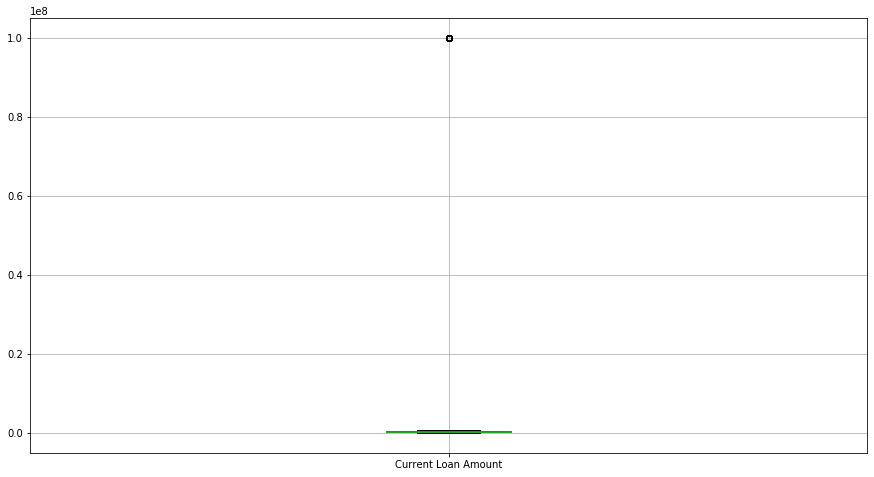

The box plot of Credit Score


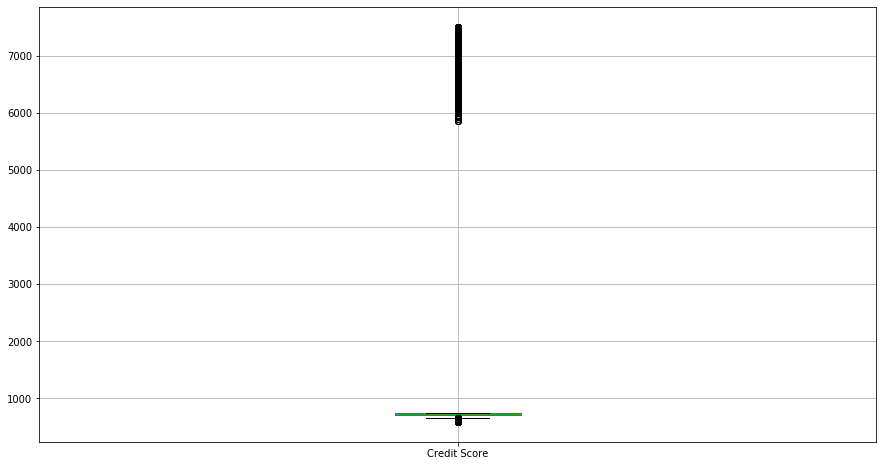

The box plot of Annual Income


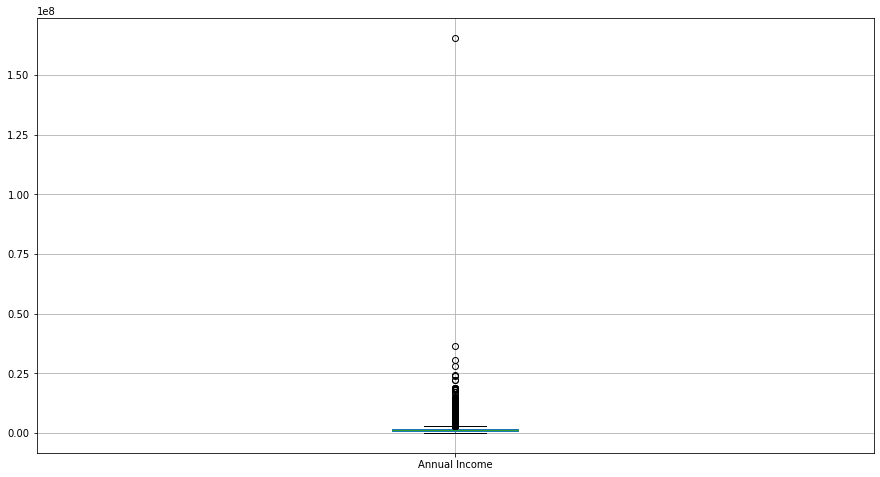

The box plot of Monthly Debt


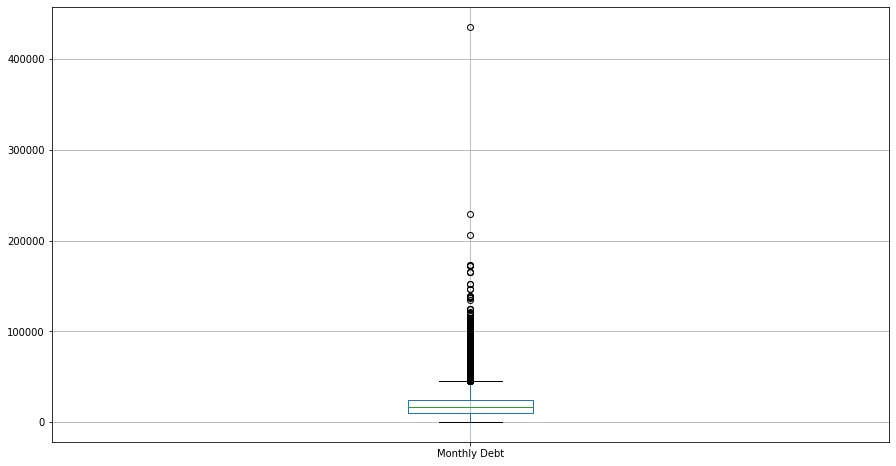

The box plot of Years of Credit History


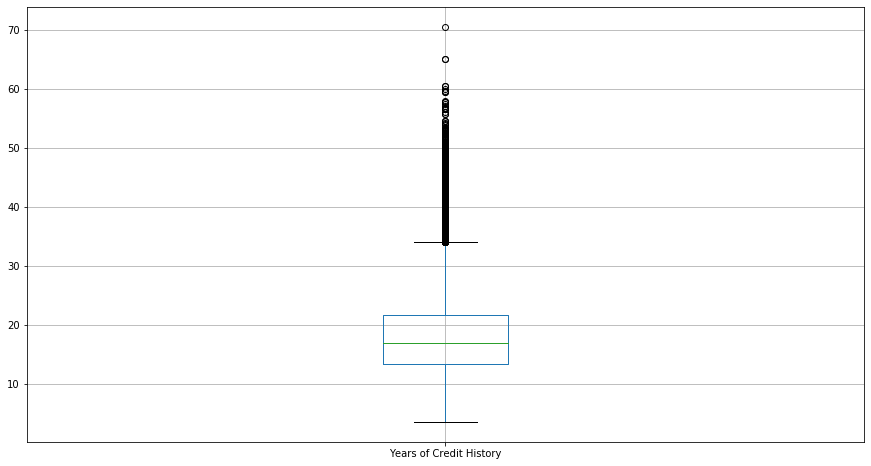

The box plot of Months since last delinquent


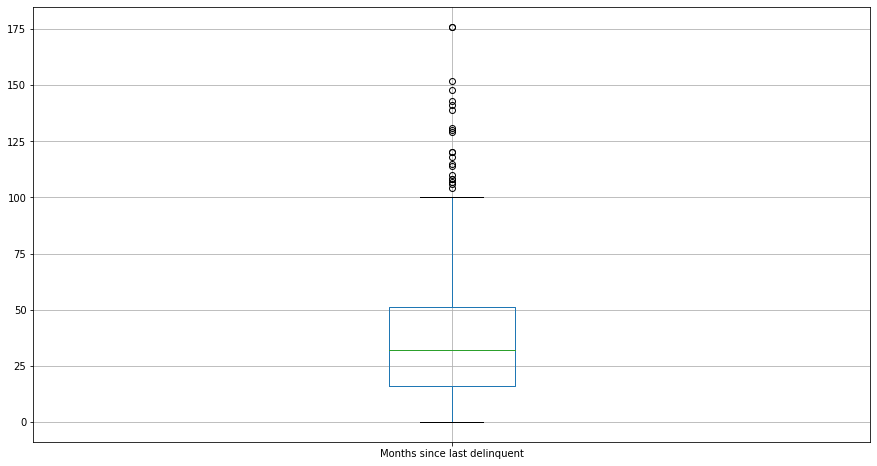

The box plot of Number of Open Accounts


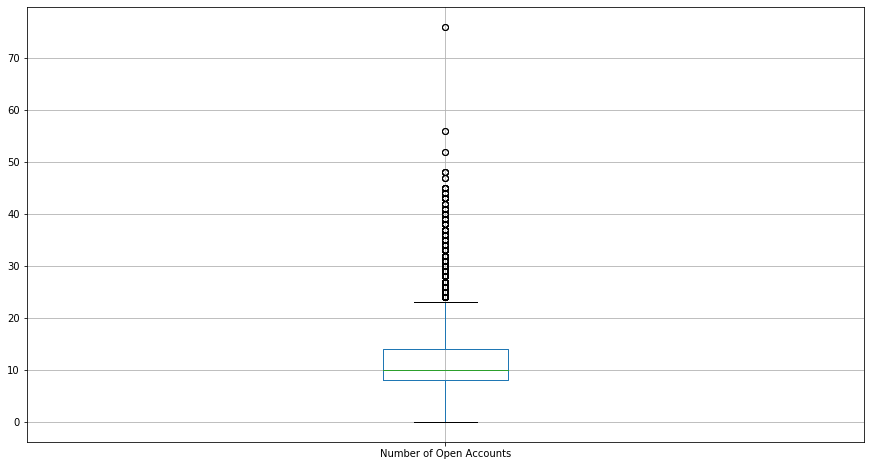

The box plot of Number of Credit Problems


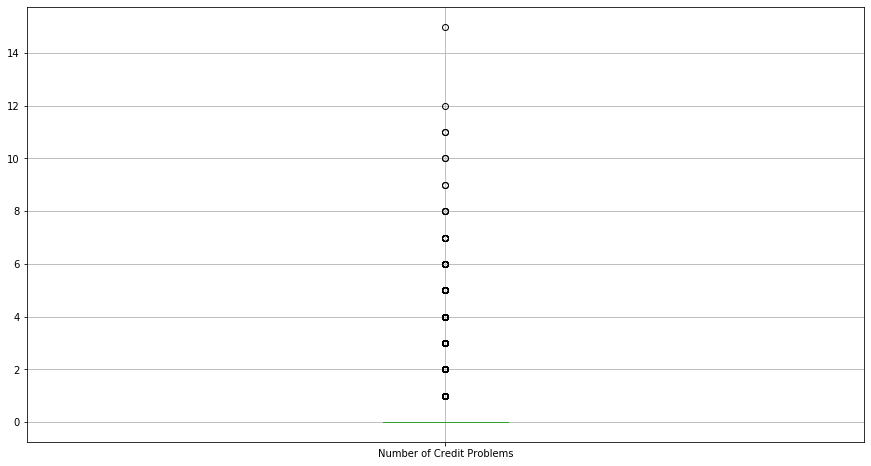

The box plot of Current Credit Balance


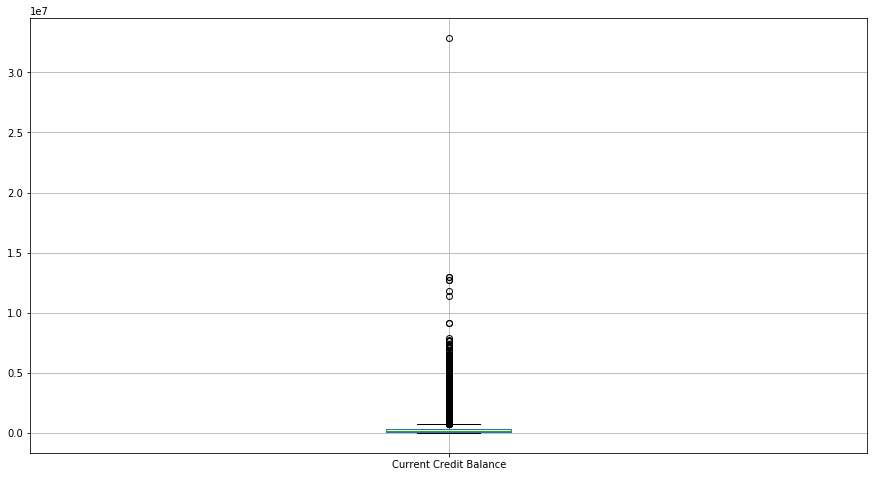

The box plot of Maximum Open Credit


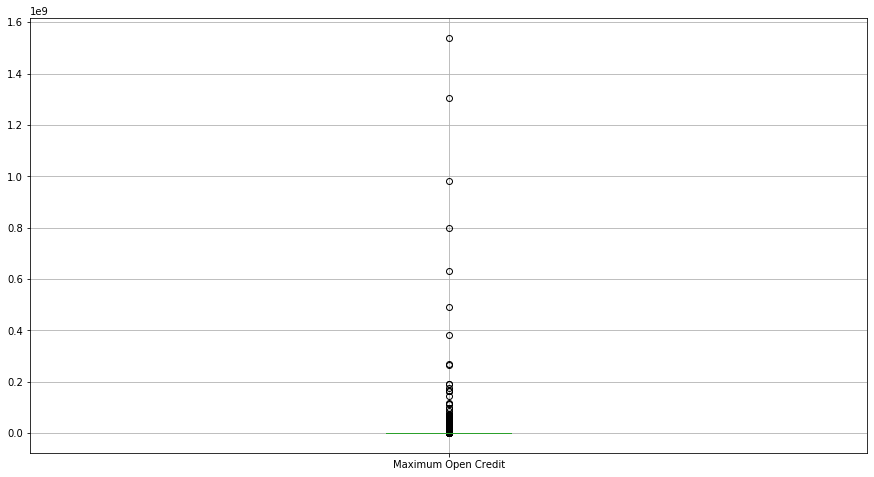

The box plot of Bankruptcies


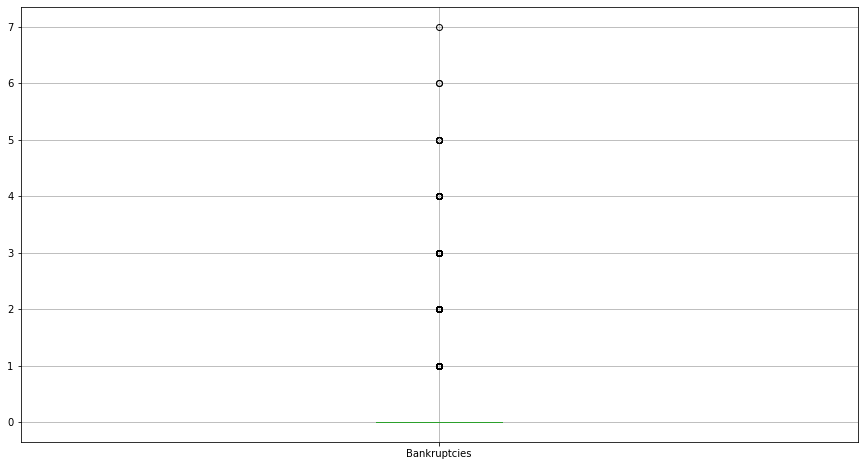

The box plot of Tax Liens


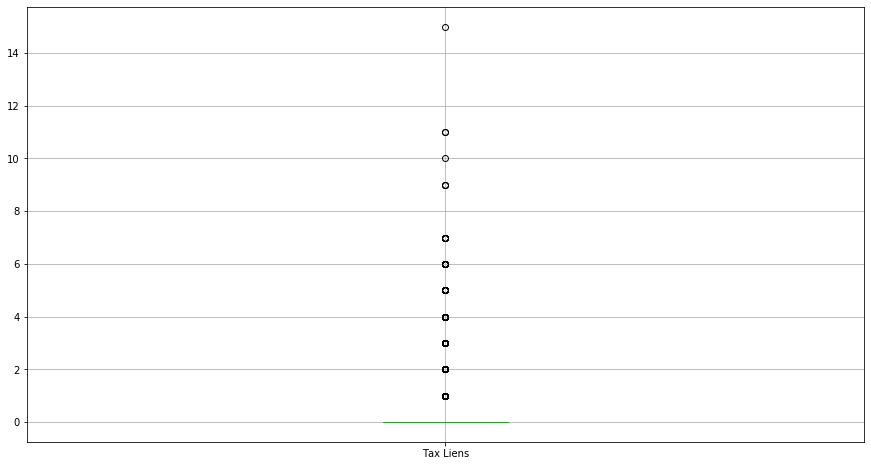

In [8]:
for i in numeric_attributes:
    loan_eda.boxplot(column=[i],figsize=(15,8))
    print('The box plot of',i)
    plt.show()

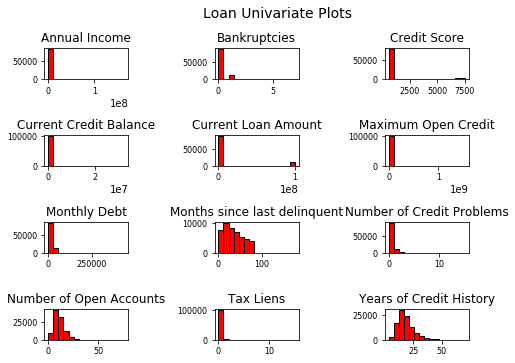

In [9]:
loan_eda.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
rt = plt.suptitle('Loan Univariate Plots', x=0.65, y=1.25, fontsize=14)  

- Here are exploratory graphs of numerical variables. The first one is Loan univariate plots, which can be used to check the distribution of each variable. As we can see, many of them are in positive skew distribution. After referring the table of statistical summary, we noticed that current Loan Amount in some records is 99,999,999 which seem to be an invalid data. And as we all know, in the US, the credit score generally comes between 300 to 850. But some of credit score from this dataset is even larger than 6000.
- The Kernel density estimations demonstrate that two loan status have the similar distribution pattern.

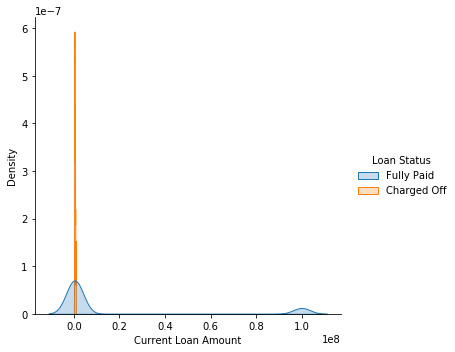

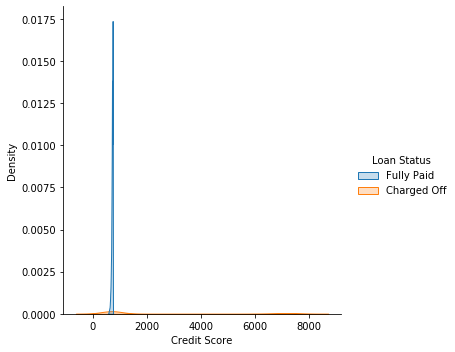

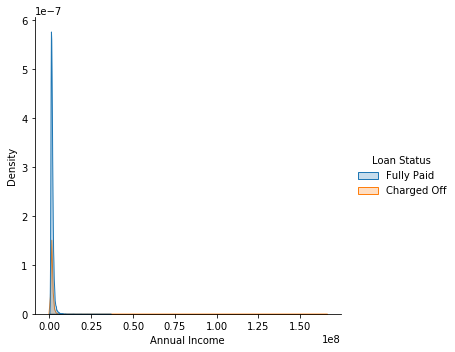

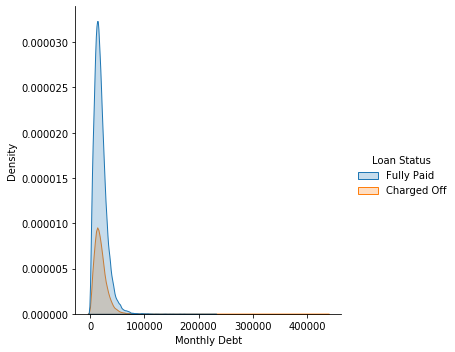

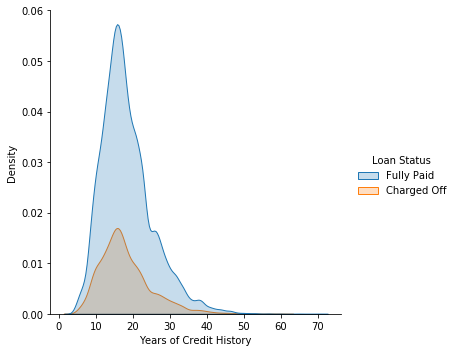

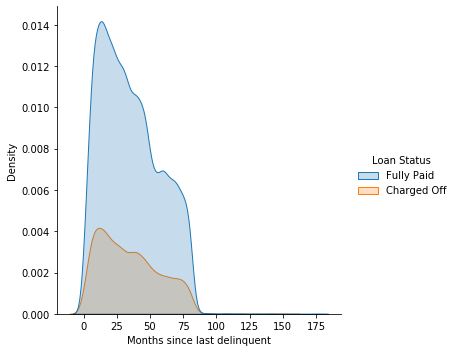

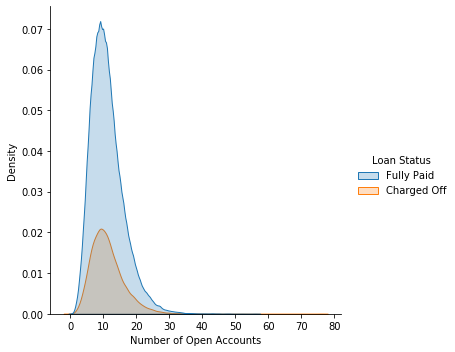

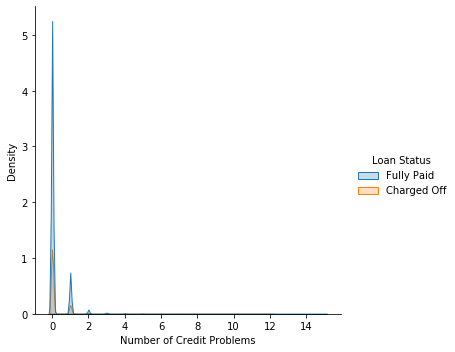

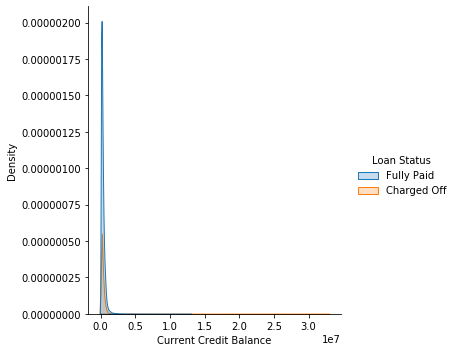

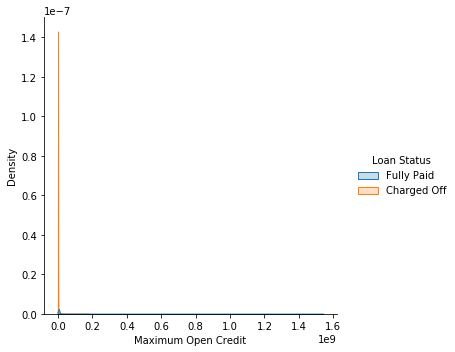

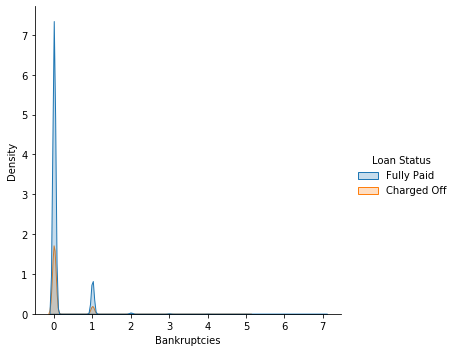

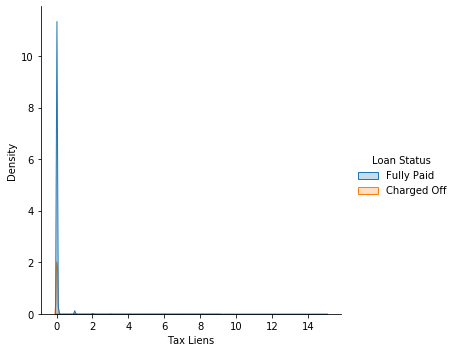

In [10]:
for i in numeric_attributes:
    sns.displot(loan_eda, x=i, hue="Loan Status", kind="kde", fill=True)

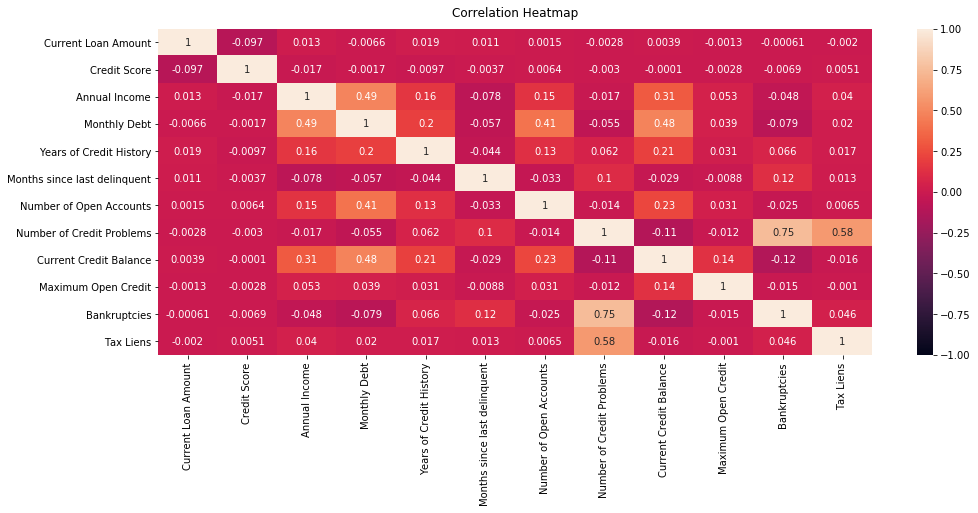

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(loan_eda[numeric_attributes].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

- The correlation heatmap of all numerical variables. We can easily identify that only number of credit problems and bankruptcies have strong positive correlation

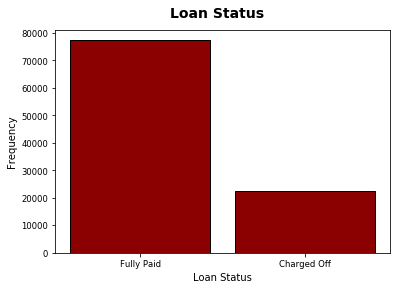

In [12]:
Loan_Status = loan_eda['Loan Status'].value_counts()
Loan_Status = (list(Loan_Status.index), list(Loan_Status.values))

fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Loan Status", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Loan Status")
ax.set_ylabel("Frequency") 
ax.tick_params(axis='both', which='major', labelsize=8.5)

bar = ax.bar(Loan_Status[0],  
             Loan_Status[1], 
             width=0.85,
             color='darkred', 
             edgecolor='black', linewidth=1)

- It is the bar chart of loan status. In this dataset, the charged off is nearly one third of fully paid.

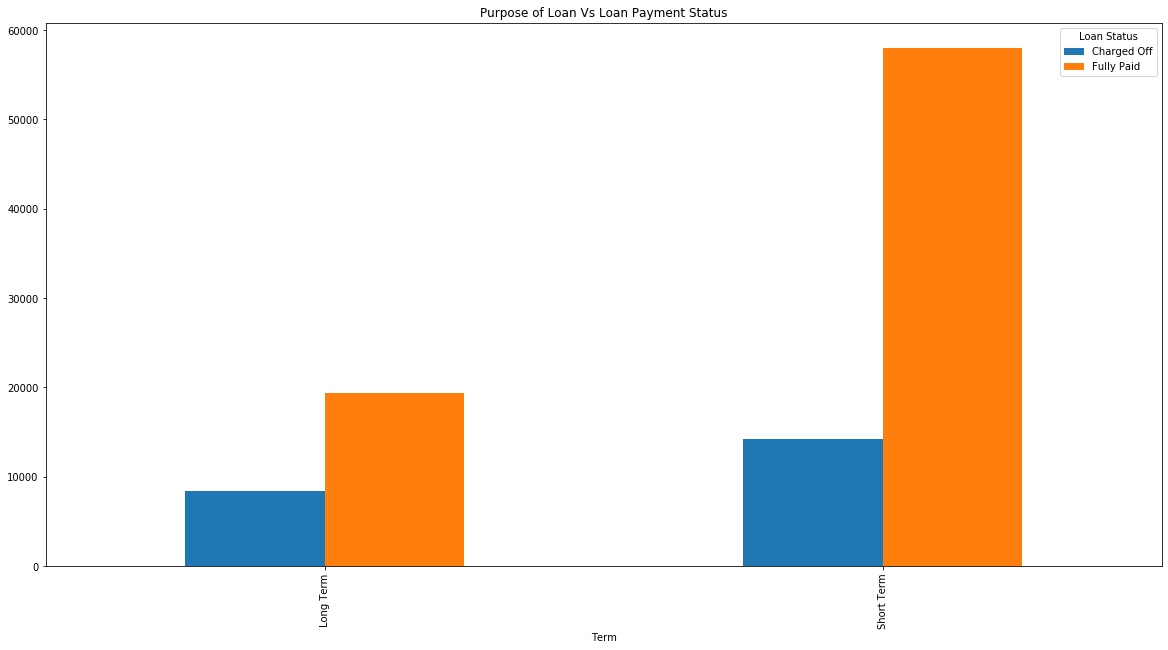

In [13]:
pd.crosstab(loan_eda['Term'], loan_eda['Loan Status']).plot(kind='bar', stacked=False, figsize=(20,10), 
                                                            title="Purpose of Loan Vs Loan Payment Status", )

- This plot shows loan term versus loan status. We found out that short term is doing better- with less charged off percentage. But still nearly one fourth of short term loan end-up-with unfinished. And there’s also an interesting observation that almost a half of customers who have long-term debt couldn’t pay it in this dataset, which is not good for bank operation in long term.

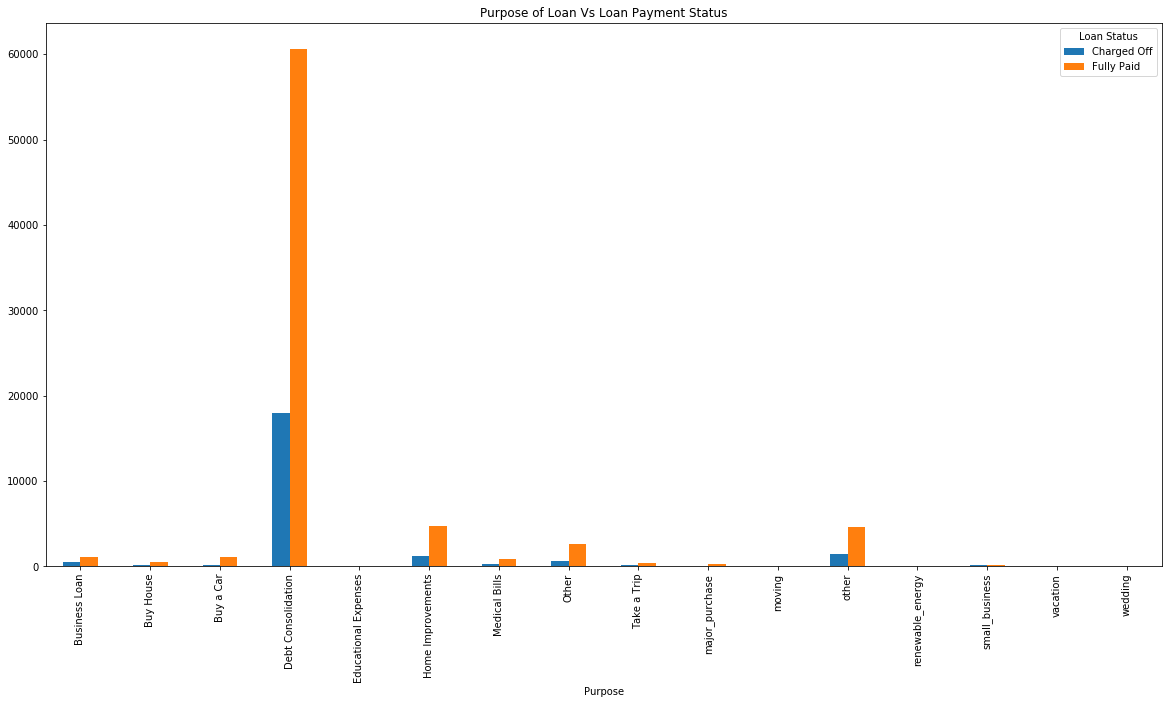

In [14]:
pd.crosstab(loan_eda['Purpose'], loan_eda['Loan Status']).plot(kind='bar', stacked=False, figsize=(20,10), 
                                                               title="Purpose of Loan Vs Loan Payment Status", )

- The next graph shows numbers of debt by purpose, debt consolidation stand-up, takes big part. Debt consolidation means combining more than one debt obligation into a new loan, it can lower your monthly payments, but can also hurt your credit score. As we can see, debt consolidation is a way to help the bank get some money back and reduce bank’s bad debt.

In [15]:
print ('Missing count: \n',loan_eda.isnull().sum())
print ('-'*60)
print ('Missing rate: \n', loan_eda.isnull().mean())

Missing count: 
 Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64
------------------------------------------------------------
Missing rate: 
 Loan Status                    0.01
Current Loan Amount            0.01
Term                           0.01
Credit Score                   0.20
Annual Income                  0.20
Years in current job           0.05
Home Ownership                 

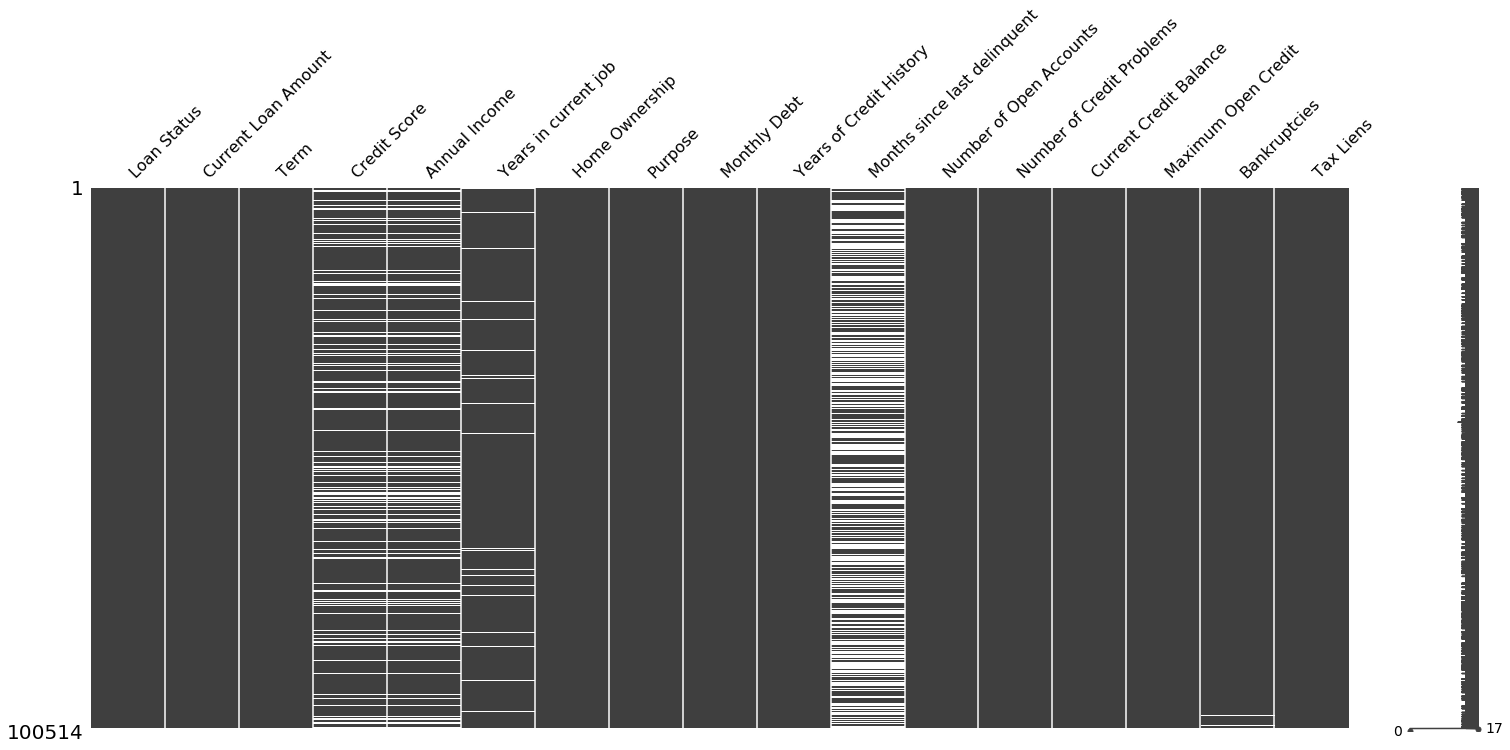

In [16]:
import missingno as msno
msno.matrix(loan_eda)
plt.show()

- The missing rate of some columns are same, we considered that all values in some rows are missing. And the missing rate of variable Months since last delinquent is larger than 0.5.

# 4. Research Question

### 4.1. IS THERE ANY INFORMATION LEAKAGE WITHIN THE SELECTED VARIABLES?

By running the bivariate analysis between each variable and target variable, we find there is no extreme imbalanced distribution, which means charged-off cases are only in one sub-category of specific variable.

But we do find for numeric variable < Credit Score >, when the value of Credit Score is higher than 1000, all cases are charged-off. We think it might the error made during database integration or other types of situation that exaggerate the value. Therefore, what we want to do is to consider those values as missing and impute with KNN.

In general, credict score larger than 850 considered as good credict score, but the histogram below, "Loan Status v.s Fully Paid" shows that there's credit score higher than 5500. In this thinking, this high credit scores should be missing values. And the most importantly, there's a large gap between 1000 to 5500.

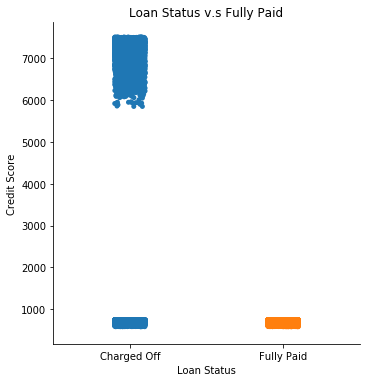

In [17]:
sns.catplot(y="Credit Score", x="Loan Status", order=["Charged Off", "Fully Paid"], 
            data=loan_eda).set(title="Loan Status v.s Fully Paid")

### 4.2. FINDING POTENTIAL CUSTOMERS WHO HAVE CAPABILITY FOR ADDITIONAL LOAN PRODUCTS?

As a banker, or loan analyst, they must be curious which group of people are the best potential customers and have ability to pay their debt and not become a bad loan. 

Thus, by doing some exploratory analysis, good customers who want to borrow money and may fully pay their debt normally have these features.
- 1. People who have long work experiences.
- 2. People who have stable life style.
- 3. People who have higher credit score.

The resones are as follows:
As the plots shown below, people who work longer than 10 years are the most amount that borrow the money, and as usual thinking, people who work more than 10 years are the group of people have relatively high salaries, thus, they have the most capable to pay their debt in the future.
What's more, since < Home Mortgage > is the most part of loan purpose, only people who have stable life have necessary to get loan.

There is 5 non numerical features including:
['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


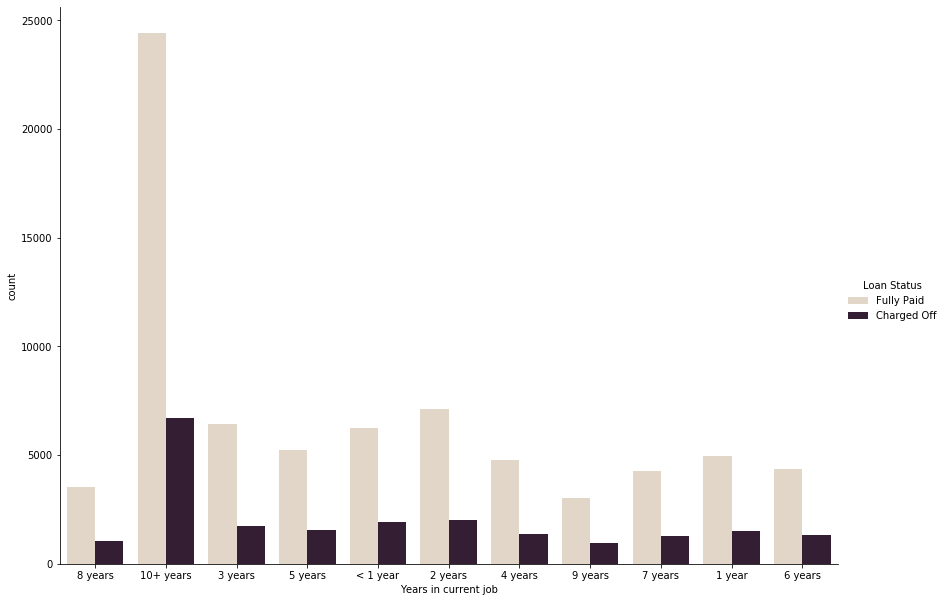

In [18]:
from matplotlib import rcParams

categorical_features = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Bankruptcies']
df_categ = loan_eda[categorical_features]

df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

# figure size in inches
rcParams['figure.figsize'] = 15,13
sns.catplot(x="Years in current job", kind="count", hue="Loan Status", palette="ch:.25", data=df_not_num,
           height=8.27, aspect=11.7/8.27)

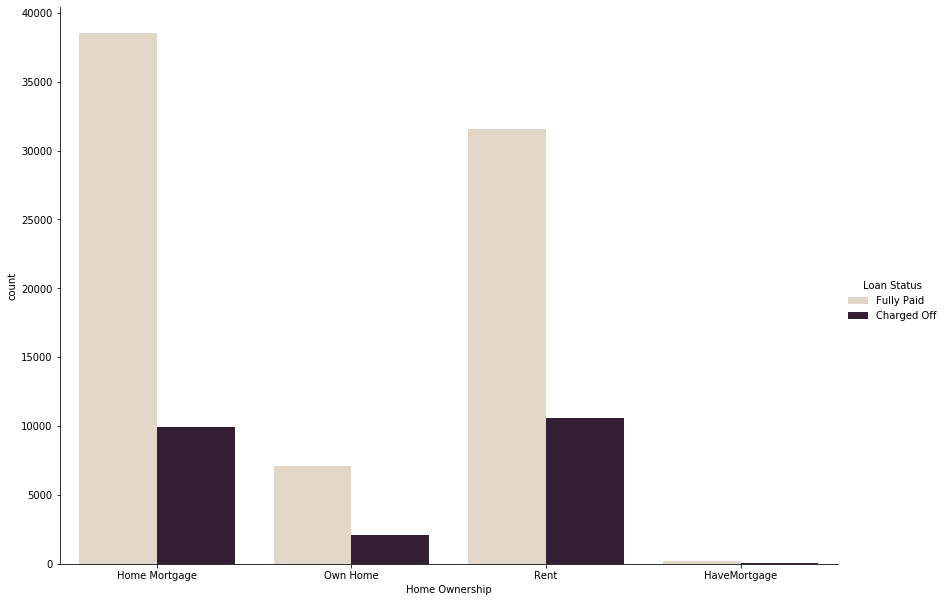

In [19]:
sns.catplot(x="Home Ownership", kind="count", hue="Loan Status", palette="ch:.25", data=df_not_num,
           height=8.27, aspect=11.7/8.27)

### 4.3. WHEN WE RAN SOME BASIC EXPLORATORY ANALYSIS, WE FOUND ALL ATTRIBUTES HAVING MISSING VALUES, SO HOW TO IMPUTE THE MISSING VALUE?

As the missing rate shown below, the missing of ***< Months since last delinquent >*** takes upto 53.38%, more than a half of data are missing, and next are ***< Credit Score >***, and ***< Annual Income >***, but their missing just takes less than 20%. Besides, 514 is a constant missing number for all variables.

Consider that the missing of < Months since last delinquent > is more than 50%, and it didn't contribute too much for our model evaluation in the future, so we decided to drop < Months since last delinquent >. 

As for other varibales, we are going to impute the missing values by using K Nearest Neighbors (KNN) and Multivariate Imputation by Chained Equations (MICE) methods.

And for more accurate and make a better model, we have used different k numbers, such as k=1,3,5,7 to build the imputation mehtods separately.

In [20]:
Nulldf = pd.DataFrame({'Count': loan_eda.isnull().sum(), 'Percent': 100 * loan_eda.isnull().sum()/len(loan_eda)})
Nulldf[Nulldf['Count']>0]

,Count,Percent
Loan Status,514,0.51
Current Loan Amount,514,0.51
Term,514,0.51
Credit Score,19668,19.57
Annual Income,19668,19.57
Years in current job,4736,4.71
Home Ownership,514,0.51
Purpose,514,0.51
Monthly Debt,514,0.51
Years of Credit History,514,0.51


In [21]:
missing=loan_eda.isnull().sum().reset_index().rename(columns={0:'missNum'})
missing['missRate']=missing['missNum']/loan_eda.shape[0]
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)

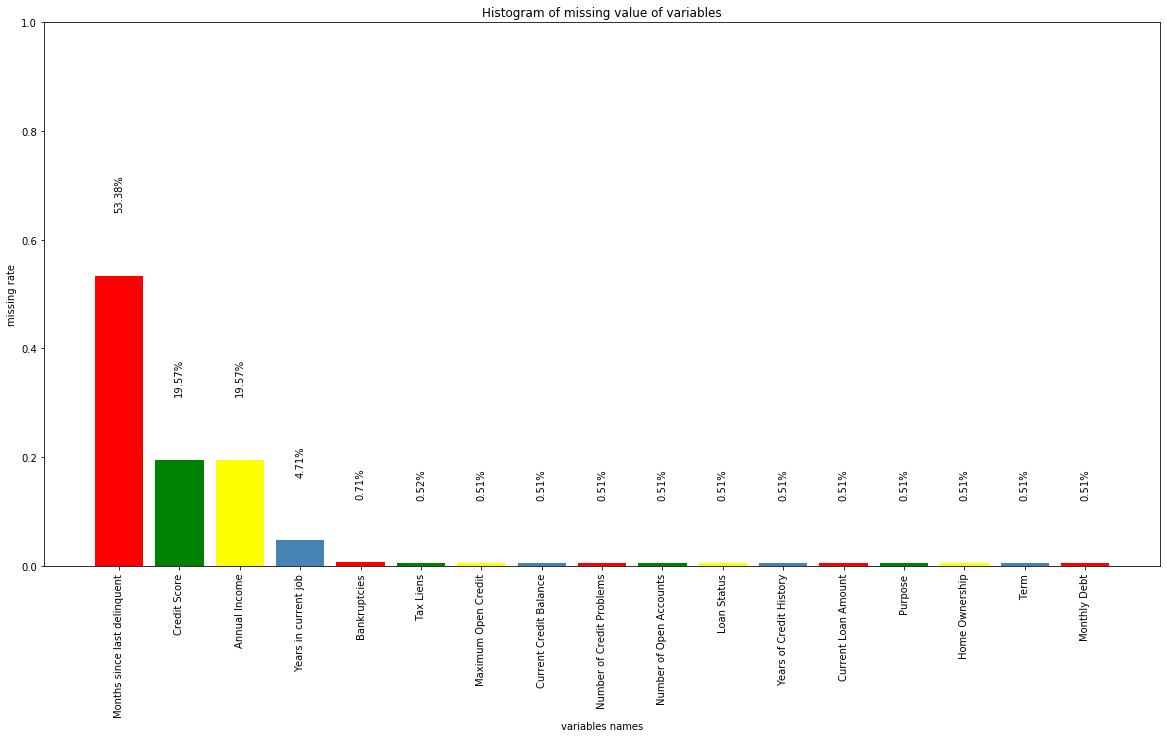

In [22]:
import numpy as np
fig = plt.figure(figsize=(20,10))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center',color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
plt.xticks(rotation=90)

for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.0])
plt.show()

# 5. Machine Learning
- In the machine learning part, we firstly used 7 models in the preliminary analysis: logistic regression, gaussian naive bayes, decision tree, random forest, adaboost, gradient boost, and SVM with RBF kernel. In the final report, we selected four models - logistic regression, decision tree, random forest, and xgboost - and compared the performance - training accuracy, test accuracy, and AUROC score of those four models.
- we paralleled three different datasets:
    - dataset #1: remove any row with missing value ==> baseline model.
    - dataset #2: drop column **|Months since last delinquent|**(with 53% missing rate) and then impute all missing values ==> advanced model 01.
    - dataset #3: keep the column **|Months since last delinquent|**, use a fixed value(0) to replace the missing values ==> advanced model 02.
- All three datasets are splited into 70%-30% training and test. The crossvalidation is set as 5 for hyperparameters tuning.
- For scaling model like logistic regression, we performed standardization and for all three tree-based model, we used the dummy-encoding variables.
- We also performed PCA for all three models. For Kernel PCA, the size of the dataset would trigger "out-of-memory error".
- The training score, test score, confusion matrix, and AUROC score are shown below. 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

import warnings
warnings.filterwarnings('ignore')

# imputation
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# model library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Normalization
from sklearn.preprocessing import MinMaxScaler
# PCA
from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

## 5.1 Load Data

In [24]:
loan = pd.read_csv('credit_train.csv')

print (loan.head())
print ('-'*60)

print (loan.shape)
print ('-'*60)

print (loan.dtypes)

                                Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid            445412.00  Short Term        709.00     1167493.00   
1  Fully Paid            262328.00  Short Term           nan            nan   
2  Fully Paid          99999999.00  Short Term        741.00     2231892.00   
3  Fully Paid            347666.00   Long Term        721.00      806949.00   
4  Fully Paid            176220.00  Short Term           nan            nan   

  Years in current job Home Ownership 

> ### 5.1.1 Get variable list
- There are nonsense variables for our analysis: Loan ID and Customer ID are just unique key, maybe the foreign key for connecting with other databases. So, in this case, we just drop these two columns.

In [25]:
drop_list = ['Loan ID', 'Customer ID']
print ('Shape before dropping:', loan.shape)

loan.drop(drop_list, axis=1, inplace=True)
print ('Shape after dropping:', loan.shape)

Shape before dropping: (100514, 19)
Shape after dropping: (100514, 17)


In [26]:
target = 'Loan Status'
print (f'Target variable is {target}.')
print ('-'*60)

categorical_attributes = loan.dtypes[loan.dtypes == object].to_frame().index.tolist()
categorical_attributes.remove(target)
print ('Categorical Attributes: ')
print (*categorical_attributes, sep='||')
print ('Number of Categorical Attributes:', len(categorical_attributes))
print ('-'*60)

numeric_attributes = loan.dtypes[loan.dtypes != object].to_frame().index.tolist()
print ('Numeric Attributes: ')
print (*numeric_attributes, sep='||')
print ('-'*60)
print ('Number of Numeric Attributes:', len(numeric_attributes))

Target variable is Loan Status.
------------------------------------------------------------
Categorical Attributes: 
Term||Years in current job||Home Ownership||Purpose
Number of Categorical Attributes: 4
------------------------------------------------------------
Numeric Attributes: 
Current Loan Amount||Credit Score||Annual Income||Monthly Debt||Years of Credit History||Months since last delinquent||Number of Open Accounts||Number of Credit Problems||Current Credit Balance||Maximum Open Credit||Bankruptcies||Tax Liens
------------------------------------------------------------
Number of Numeric Attributes: 12


In [27]:
loan_ori = loan.copy() # keep the original data
loan_baseline = loan.copy() # the dataset for baseline model 01

loan_advanced01 = loan.copy() # the dataset for advanced model 01
loan_advanced02 = loan.copy() # the dataset for advanced model 02

## 5.2 Missing Analysis and Imputation

> ### 5.2.1 For baseline model 01 - Removing all missing rows

In [28]:
print ('Missing count: \n',loan_baseline.isnull().sum())

Missing count: 
 Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


In [29]:
print ('Shape before dropping:', loan_baseline.shape)
loan_baseline.dropna(axis=0, how='any', inplace=True)
print ('Shape after dropping:', loan_baseline.shape)

Shape before dropping: (100514, 17)
Shape after dropping: (36423, 17)


In [30]:
print ('Missing count: \n',loan_baseline.isnull().sum())

Missing count: 
 Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


In [31]:
loan_baseline.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
6,Fully Paid,217646.00,Short Term,730.00,1184194.00,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.60,10.00,13.00,1.00,122170.00,272052.00,1.00,0.00
8,Fully Paid,548746.00,Short Term,678.00,2559110.00,2 years,Rent,Debt Consolidation,18660.28,22.60,33.00,4.00,0.00,437171.00,555038.00,0.00,0.00
10,Fully Paid,99999999.00,Short Term,728.00,714628.00,3 years,Rent,Debt Consolidation,11851.06,16.00,76.00,16.00,0.00,203965.00,289784.00,0.00,0.00
12,Fully Paid,99999999.00,Short Term,740.00,776188.00,< 1 year,Own Home,Debt Consolidation,11578.22,8.50,25.00,6.00,0.00,134083.00,220220.00,0.00,0.00


In [32]:
loan_baseline['Loan Status'] = loan_baseline['Loan Status'].map({'Charged Off': 1, 'Fully Paid': 0})

loan_baseline_dummy = pd.get_dummies(loan_baseline)
print (loan_baseline_dummy.shape)

(36423, 46)


In [33]:
loan_baseline_dummy.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,0,99999999.00,741.00,2231892.00,29200.53,14.90,29.00,18.00,1.00,297996.00,...,0,0,0,0,0,0,0,0,0,0
6,0,217646.00,730.00,1184194.00,10855.08,19.60,10.00,13.00,1.00,122170.00,...,0,0,0,0,0,0,0,0,0,0
8,0,548746.00,678.00,2559110.00,18660.28,22.60,33.00,4.00,0.00,437171.00,...,0,0,0,0,0,0,0,0,0,0
10,0,99999999.00,728.00,714628.00,11851.06,16.00,76.00,16.00,0.00,203965.00,...,0,0,0,0,0,0,0,0,0,0
12,0,99999999.00,740.00,776188.00,11578.22,8.50,25.00,6.00,0.00,134083.00,...,0,0,0,0,0,0,0,0,0,0


> ### 5.2.2 For advanced model01 - imputation

In [34]:
print (loan_advanced01.shape)
print ('-'*60)
print (loan_advanced01.isnull().sum())

(100514, 17)
------------------------------------------------------------
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


- Notice here, all columns are with missing, and there is one value 514 within 10 columns. This might be represents all of these rows are with missing.
- **Solution: remove the rows if the rows are fully missing, and then check missing rate again.**

In [35]:
# loan without all rows are missing
print ('Shape before removing: ', loan_advanced01.shape)
loan_advanced01.dropna(axis=0, how='all', inplace=True)
print ('Shape after removing: ',loan_advanced01.shape)
print ('-'*60)

print ('Missing count: \n',loan_advanced01.isnull().sum())

Shape before removing:  (100514, 17)
Shape after removing:  (100000, 17)
------------------------------------------------------------
Missing count: 
 Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64


In [36]:
print ('Missing rate: \n',loan_advanced01.isnull().mean())

Missing rate: 
 Loan Status                    0.00
Current Loan Amount            0.00
Term                           0.00
Credit Score                   0.19
Annual Income                  0.19
Years in current job           0.04
Home Ownership                 0.00
Purpose                        0.00
Monthly Debt                   0.00
Years of Credit History        0.00
Months since last delinquent   0.53
Number of Open Accounts        0.00
Number of Credit Problems      0.00
Current Credit Balance         0.00
Maximum Open Credit            0.00
Bankruptcies                   0.00
Tax Liens                      0.00
dtype: float64


- Now, there is only one categorical attribute, Years in current job, has missing.
- there are 6 numeric attributes with missing. One of them, Months since last delinquent, has a missing rate 0.53141 which is larger than 30%. Therefore, we are going to drop this column directly.
- And for the remaining numeric attributes with missing, we are going to impute.

In [37]:
print ('Shape before removing: ', loan_advanced01.shape)
loan_advanced01.drop(columns=['Months since last delinquent'], inplace=True)
print ('Shape after removing: ',loan_advanced01.shape)

Shape before removing:  (100000, 17)
Shape after removing:  (100000, 16)


- there are few columns with weird values which are contradicted with our common sense or knowledge. Therefore, we believe those weird values are made by :
    - applicant delibrate hidding
    - some error during the integration of database
    - customer service input error
    - use some extreme numbers to represent missing.
- another solution is to **drop** these weird rows.

> **| Current Loan Amount |**

In [38]:
# count how many weird values
print ('Count:',loan_advanced01['Current Loan Amount'].tolist().count(99999999.0))

print ('Type before replacement:', loan_advanced01['Current Loan Amount'].dtype)

loan_advanced01['Current Loan Amount'] = loan_advanced01['Current Loan Amount'].replace([99999999.0], 'NaN') # replace the 99999999.0 with NaN

print ('Type after replacement:', loan_advanced01['Current Loan Amount'].dtype)

Count: 11484
Type before replacement: float64
Type after replacement: object


- After adding NaN, the type of that column, Current Loan Amount, has changed from numeric(float64) to categorical(object), therefore, the first thing we need to do for missing checking is to change the type of that column.

In [39]:
loan_advanced01 = loan_advanced01.astype({'Current Loan Amount': 'float64'})
print (loan_advanced01['Current Loan Amount'].dtype)

float64


In [40]:
# check missing of this column only
print (loan_advanced01['Current Loan Amount'].isnull().sum())
print (loan_advanced01['Current Loan Amount'].isnull().mean())

11484
0.11484


> **| Credit Score |**
- We also found within the column Credit Score, there are values more than 1000, which contradicts the life experience... and majority of such weird values are at least more than 5000. Therefore, we use this as threshold, and any values above this threshold are considered as missing.

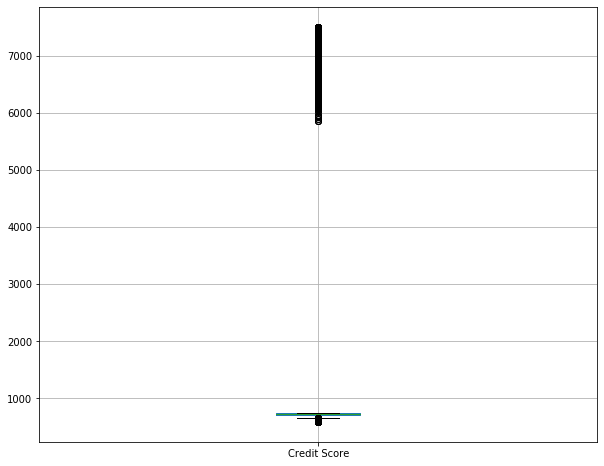

In [41]:
# show the boxplot
loan_advanced01.boxplot(column=['Credit Score'],figsize=(10,8))
plt.show()

# Within the above boxplot, we find the extreme value are more than 5000.

In [42]:
# count how many weird values
print ('Count:', len(loan_advanced01['Credit Score'][loan_advanced01['Credit Score'] > 5000].tolist()))

Count: 4551


In [43]:
print ('Type before replacement:', loan_advanced01['Credit Score'].dtype)

loan_advanced01['Credit Score'] = loan_advanced01['Credit Score'].replace([i for i in range(5000, 10000)], 'NaN') # replace >= 5000 with NaN

print ('Type after replacement:', loan_advanced01['Credit Score'].dtype)

Type before replacement: float64
Type after replacement: object


In [44]:
loan_advanced01 = loan_advanced01.astype({'Credit Score': 'float64'})
print (loan_advanced01['Credit Score'].dtype)

float64


In [45]:
# check missing of this column only
print (loan_advanced01['Credit Score'].isnull().sum())
print (loan_advanced01['Credit Score'].isnull().mean())

23705
0.23705


> **convert target varaible, |Loan Status|**

In [46]:
print ('Before:')
print (loan_advanced01[target].value_counts())
print ('-'*60)

loan_advanced01['target'] = [1 if out=='Charged Off' else 0 for out in loan_advanced01['Loan Status']]
print ('After:')
print (loan_advanced01['target'].value_counts())

Before:
Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64
------------------------------------------------------------
After:
0    77361
1    22639
Name: target, dtype: int64


In [47]:
# remove the original column - Loan Status
print ('Shape before dropping:', loan_advanced01.shape)

loan_advanced01.drop('Loan Status', axis=1, inplace=True)

print ('Shape after dropping:', loan_advanced01.shape)

Shape before dropping: (100000, 17)
Shape after dropping: (100000, 16)


> **Change the subtypes of |Home Ownership|**
- merging HomeMortgage and Have Mortgage into Mortgage.

In [48]:
print ('Before:')
print (loan_advanced01['Home Ownership'].value_counts())
print ('-'*60)

loan_advanced01['Home Ownership'] = loan_advanced01['Home Ownership'].replace(['HaveMortgage', 'Home Mortgage'], 'Mortgage')

print ('After:')
print (loan_advanced01['Home Ownership'].value_counts())

Before:
Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64
------------------------------------------------------------
After:
Mortgage    48624
Rent        42194
Own Home     9182
Name: Home Ownership, dtype: int64


> ### Missing Imputation

In [49]:
loan_advanced01.shape

(100000, 16)

In [50]:
target = 'target'
print (f'Target variable is {target}.')
print ('-'*60)

categorical_attributes = loan_advanced01.dtypes[loan_advanced01.dtypes == object].to_frame().index.tolist()
print ('Categorical Attributes: ')
print (*categorical_attributes, sep='||')
print ('Number of Categorical Attributes:', len(categorical_attributes))
print ('-'*60)

numeric_attributes = loan_advanced01.dtypes[loan_advanced01.dtypes != object].to_frame().index.tolist()
numeric_attributes.remove(target)
print ('Numeric Attributes: ')
print (*numeric_attributes, sep='||')
print ('-'*60)
print ('Number of Numeric Attributes:', len(numeric_attributes))

Target variable is target.
------------------------------------------------------------
Categorical Attributes: 
Term||Years in current job||Home Ownership||Purpose
Number of Categorical Attributes: 4
------------------------------------------------------------
Numeric Attributes: 
Current Loan Amount||Credit Score||Annual Income||Monthly Debt||Years of Credit History||Number of Open Accounts||Number of Credit Problems||Current Credit Balance||Maximum Open Credit||Bankruptcies||Tax Liens
------------------------------------------------------------
Number of Numeric Attributes: 11


In [51]:
# check missing
print (loan_advanced01.isnull().sum())

print ('-'*60)
print (loan_advanced01.isnull().mean())

Current Loan Amount          11484
Term                             0
Credit Score                 23705
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
target                           0
dtype: int64
------------------------------------------------------------
Current Loan Amount         0.11
Term                        0.00
Credit Score                0.24
Annual Income               0.19
Years in current job        0.04
Home Ownership              0.00
Purpose                     0.00
Monthly Debt                0.00
Years of Credit History     0.00
Number of Open Accounts     0.00
Number of Credit Problems   0.00
Cur

> Fillin categorical missing - Intuition
- there are two common way of categorical imputation:
    - use the most common one.
    - use the unknow for missing. => create a new category.
https://jamesrledoux.com/code/imputation#:~:text=One%20approach%20to%20imputing%20categorical,given%20in%20Pandas'%20value_counts%20function.
- in this case, we will use the **first** method. BUT, we can always perform the second method and compare.

In [52]:
print ('missing count:', loan_advanced01['Years in current job'].isnull().sum())

print ('-'*60)
print (loan_advanced01['Years in current job'].value_counts())

missing count: 4222
------------------------------------------------------------
10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64


In [53]:
most_common = loan_advanced01['Years in current job'].value_counts().index[0]
print (most_common)

10+ years


In [54]:
loan_advanced01['Years in current job'].fillna(value=most_common, inplace=True)
print (loan_advanced01['Years in current job'].value_counts())

10+ years    35343
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64


- In our preliminary analysis, we found dataset generated by MICE imputation had a better performance than KNN with a faster speed. Therefore, we decided to only use MICE in our final report models.

> ### Mice Imputation
- reference
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/#:~:text=Missing%20data%20are%20a%20common,method%20of%20addressing%20missing%20data.
https://stats.stackexchange.com/questions/421545/multiple-imputation-by-chained-equations-mice-explained

In [55]:
X = loan_advanced01.drop('target', axis=1)
y = loan_advanced01['target']

print (X.shape, y.shape)
print ('-'*60)

X_dummy = pd.get_dummies(X)
print (X_dummy.shape)
print ('-'*60)

column_name = X_dummy.columns.tolist()
print (column_name)
print ('-'*60)

(100000, 15) (100000,)
------------------------------------------------------------
(100000, 43)
------------------------------------------------------------
['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Long Term', 'Term_Short Term', 'Years in current job_1 year', 'Years in current job_10+ years', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_< 1 year', 'Home Ownership_Mortgage', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Debt Consolidation', 'Purpose_Educational Expenses', 'Purpose_Ho

In [56]:
%%time
imputer = IterativeImputer()
X_dummy_mice = imputer.fit_transform(X_dummy)

# convert to dataframe
X_dummy_mice_df = pd.DataFrame(data=X_dummy_mice, columns=column_name)
X_dummy_mice_df.head()

Wall time: 45 s


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.00,709.00,1167493.00,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,262328.00,728.40,1476369.15,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,313983.74,741.00,2231892.00,29200.53,14.90,18.00,1.00,297996.00,750090.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,347666.00,721.00,806949.00,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,176220.00,721.17,1078625.35,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [57]:
loan_advanced01_mice = pd.concat([X_dummy_mice_df, y], axis=1)
loan_advanced01_mice.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,target
0,445412.00,709.00,1167493.00,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,262328.00,728.40,1476369.15,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,313983.74,741.00,2231892.00,29200.53,14.90,18.00,1.00,297996.00,750090.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,347666.00,721.00,806949.00,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,176220.00,721.17,1078625.35,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


> ### 5.2.3 For advanced model02
- use fixed value (0) for missing in **Months since last delinquent**

In [58]:
print (loan_advanced02.shape)
print ('-'*60)

print (loan_advanced02.isnull().sum())

(100514, 17)
------------------------------------------------------------
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


In [59]:
values = {'Months since last delinquent': 0} # fixed value for Months since last deliquent
loan_advanced02.fillna(value=values, inplace=True)
loan_advanced02.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent        0
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [60]:
loan_advanced02.dropna(inplace=True)
print (loan_advanced02.shape)
print ('-'*60)

print (loan_advanced02.isnull().sum())

(77271, 17)
------------------------------------------------------------
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


In [61]:
# remove all rows where Current Loan Amount equals to 999999999
loan_advanced02.drop(loan_advanced02.loc[loan['Current Loan Amount']==99999999.0].index, inplace=True)

loan_advanced02['Annual Income'] = loan_advanced02['Annual Income'].astype('int64') 

loan_advanced02['Loan Status'] = loan_advanced02['Loan Status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [62]:
loan_advanced02_dummy = pd.get_dummies(loan_advanced02)
print (loan_advanced02_dummy.shape)

print (loan_advanced02_dummy.columns.tolist())

(66242, 46)
['Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Long Term', 'Term_Short Term', 'Years in current job_1 year', 'Years in current job_10+ years', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_< 1 year', 'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Debt Consolidation', 'Purpose_Educational Expenses', 'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other', 'Pu

In [63]:
loan_advanced02_dummy.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,445412.00,709.00,1167493,5214.74,17.20,0.00,6.00,1.00,228190.00,...,0,0,0,0,0,0,0,0,0,0
3,0,347666.00,721.00,806949,8741.90,12.00,0.00,9.00,0.00,256329.00,...,0,0,0,0,0,0,0,0,0,0
5,1,206602.00,7290.00,896857,16367.74,17.30,0.00,6.00,0.00,215308.00,...,0,0,0,0,0,0,0,0,0,0
6,0,217646.00,730.00,1184194,10855.08,19.60,10.00,13.00,1.00,122170.00,...,0,0,0,0,0,0,0,0,0,0
8,0,548746.00,678.00,2559110,18660.28,22.60,33.00,4.00,0.00,437171.00,...,0,0,0,0,0,0,0,0,0,0


> ### 5.2.4 Save files

In [64]:
#loan_baseline_dummy.to_csv('baseline_data.csv')
#loan_advanced01_mice.to_csv('advanced01_data.csv')
#loan_advanced02_dummy.to_csv('advanced02_data.csv')

In [65]:
loan_advanced01_mice.rename(columns={'target':'Loan Status'}, inplace=True)

## 5.3 Modeling

> ### 5.3.1 Helper function
- train-test splitting, 70%-30%, stratified splitting, randomState=23333.
- optional feature importance - use xgboost for feature selection: selecting most importance features.
- remove highly correlated variables.
- standardization X_train, X_test for models like logistic regression and RBF-Kernel SVM.

In [91]:
def train_test(df, randomState):
    X = df.drop('Loan Status', axis=1)
    y = df['Loan Status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=randomState, test_size=0.3)
    return X_train, X_test, y_train, y_test
# -----------------------------------------------------------------------------------------------------------------------
def correlation(train):
    corr_matrix = train.corr().abs()
    upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.7)]
    #print (to_drop)
    return to_drop
# -----------------------------------------------------------------------------------------------------------------------
def variable_correlation_dropping(x_train, x_test, drop):
    if not drop:
        return x_train, x_test
    else:
        x_train.drop(drop, axis=1, inplace=True)
        x_test.drop(drop, axis=1, inplace=True)
        return x_train, x_test
# -----------------------------------------------------------------------------------------------------------------------
def standardization(x_train, x_test):
    sd = preprocessing.StandardScaler()
    x_train_sd = sd.fit_transform(x_train)
    x_test_sd = sd.transform(x_test)
    return x_train_sd, x_test_sd
# -----------------------------------------------------------------------------------------------------------------------
def step_preprocessing(df, step_feature_selection, randomState):

    # train-test splitting
    X_train, X_test, y_train, y_test = train_test(df, randomState)
 
    # correlation analysis and highly-correlated variable(s) removal
    to_drop = correlation(X_train)
    X_train, X_test = variable_correlation_dropping(X_train, X_test, to_drop)
        
    # standardization
    X_train_sd, X_test_sd = standardization(X_train, X_test)
    
    # get the column, and convert dataframe to numpy_array
    column = X_train.columns.tolist()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    return column, X_train, X_test, X_train_sd, X_test_sd, y_train, y_test

In [67]:
def evaluation_metrics(X_train, X_test, y_train, y_test, clf):
    '''This functions takes the classifier as input and print the evaluation metrics.'''
    print ('Classifier:', clf)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) # calculate the predicted value of x_val by classififier
    
    # train accuracy and test accuracy
    accuracy_train = metrics.accuracy_score(y_train, clf.predict(X_train))
    accuracy_test = metrics.accuracy_score(y_test, y_pred)
        
    auroc_score = metrics.roc_auc_score(y_test,y_pred)
    print ('Training accuracy:', accuracy_train)
    print ('Test accuracy:', accuracy_test)
    print ('AUROC score:', auroc_score)
    
    # confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print ('Confusion matrix:\n', confusion)
    print ('-'*60)
    
    return accuracy_train, accuracy_test, auroc_score
# -----------------------------------------------------------------------------------------------------------------------
def modeling(X_train, X_test, X_train_sd, X_test_sd, y_train, y_test):
    
    # initialize all models
    logistic = LogisticRegression()
    decision_tree = DecisionTreeClassifier(random_state=23)
    random_forest = RandomForestClassifier(random_state=23)
    xgboost = XGBClassifier(random_state=23)

    # activate all models and get training accuracy, test accuracy, and auroc score
    accuracy_train_log, accuracy_test_log, auroc_log = evaluation_metrics(X_train_sd, X_test_sd, y_train, y_test, logistic)
    accuracy_train_dt, accuracy_test_dt, auroc_dt = evaluation_metrics(X_train, X_test, y_train, y_test, decision_tree)
    accuracy_train_rf, accuracy_test_rf, auroc_rf = evaluation_metrics(X_train, X_test, y_train, y_test, random_forest)
    accuracy_train_xgb, accuracy_test_xgb, auroc_xgb = evaluation_metrics(X_train, X_test, y_train, y_test, xgboost)
    
    result = pd.DataFrame({
        'Logistic Regression':[accuracy_train_log, accuracy_test_log, auroc_log],
        'Decision Tree':[accuracy_train_dt, accuracy_test_dt, auroc_dt],
        'Random Forest':[accuracy_train_rf, accuracy_test_rf, auroc_rf],
        'Xgboost':[accuracy_train_xgb, accuracy_test_xgb, auroc_xgb]},
        index=['Training Accuracy', 'Test Accuracy', 'AUROC'])
    
    return result

In [92]:
def one_step_function(df, step_feature_selection=False, randomState=23333):
    # baseline model
    column_name, X_train, X_test, X_train_sd, X_test_sd, y_train, y_test = step_preprocessing(df, step_feature_selection, randomState)
    result = modeling(X_train, X_test, X_train_sd, X_test_sd, y_train, y_test)
    
    return result

In [69]:
def train_test(df, randomState):
    X = df.drop('Loan Status', axis=1)
    y = df['Loan Status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=randomState, test_size=0.3)
    return X_train, X_test, y_train, y_test
# -----------------------------------------------------------------------------------------------------------------------
def normalization(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    return X_train_normalized, X_test_normalized
# -----------------------------------------------------------------------------------------------------------------------
def pca_train(train, test, proportion):
    pca = PCA(n_components = proportion)
    pca.fit(train)
    
    train_pca = pca.transform(train)
    test_pca = pca.transform(test)
    
    return train_pca, test_pca
# -----------------------------------------------------------------------------------------------------------------------
def step_pca(df, proportion, randomState):
    # train-test split
    X_train, X_test, y_train, y_test = train_test(df, randomState)
    
    # normalization
    X_train_normalized, X_test_normalized = normalization(X_train, X_test)
    
    # pca
    X_train_pca, X_test_pca = pca_train(X_train_normalized, X_test_normalized, proportion)
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    return X_train_pca, X_test_pca, y_train, y_test
# -----------------------------------------------------------------------------------------------------------------------
def modeling_pca(X_train, X_test, y_train, y_test):
    
    # initialize all models
    logistic = LogisticRegression()
    decision_tree = DecisionTreeClassifier(random_state=23)
    random_forest = RandomForestClassifier(random_state=23)
    xgboost = XGBClassifier(random_state=23)
    
    # activate all models and get training accuracy, test accuracy, and auroc score
    accuracy_train_log, accuracy_test_log, auroc_log = evaluation_metrics(X_train, X_test, y_train, y_test, logistic)
    accuracy_train_dt, accuracy_test_dt, auroc_dt = evaluation_metrics(X_train, X_test, y_train, y_test, decision_tree)
    accuracy_train_rf, accuracy_test_rf,auroc_rf = evaluation_metrics(X_train, X_test, y_train, y_test, random_forest)
    accuracy_train_xgb, accuracy_test_xgb,auroc_xgb = evaluation_metrics(X_train, X_test, y_train, y_test, xgboost)
    
    result = pd.DataFrame({
        'Logistic Regression':[accuracy_train_log, accuracy_test_log, auroc_log],
        'Decision Tree':[accuracy_train_dt, accuracy_test_dt, auroc_dt],
        'Random Forest':[accuracy_train_rf, accuracy_test_rf, auroc_rf],
        'Xgboost':[accuracy_train_xgb, accuracy_test_xgb, auroc_xgb]},
        index=['Training Accuracy', 'Test Accuracy', 'AUROC'])
    
    return result
# -----------------------------------------------------------------------------------------------------------------------
def one_step_pca_model(df, proportion=0.95, randomState=23333):
    X_train_pca, X_test_pca, y_train, y_test = step_pca(df, proportion, randomState)
    result = modeling_pca(X_train_pca, X_test_pca, y_train, y_test)
    return result

> ### 5.3.2 baseline model

In [70]:
%%time
baseline_result01 = one_step_function(loan_baseline_dummy)

Classifier: LogisticRegression()
Training accuracy: 0.8488782554126137
Test accuracy: 0.8492724444037705
AUROC score: 0.6320421926202293
Confusion matrix:
 [[8689    3]
 [1644  591]]
------------------------------------------------------------
Classifier: DecisionTreeClassifier(random_state=23)
Training accuracy: 1.0
Test accuracy: 0.7876818888990573
AUROC score: 0.6652884804459035
Confusion matrix:
 [[7583 1109]
 [1211 1024]]
------------------------------------------------------------
Classifier: RandomForestClassifier(random_state=23)
Training accuracy: 1.0
Test accuracy: 0.8500960922485586
AUROC score: 0.6350527523573324
Confusion matrix:
 [[8683    9]
 [1629  606]]
------------------------------------------------------------
Classifier: XGBClassifier(random_state=23)
Training accuracy: 0.8489174772513336
Test accuracy: 0.8496385101125652
AUROC score: 0.6324384787472036
Confusion matrix:
 [[8692    0]
 [1643  592]]
------------------------------------------------------------
Wall t

In [71]:
%%time
baseline_result02 = one_step_pca_model(loan_baseline_dummy)

Classifier: LogisticRegression()
Training accuracy: 0.8489174772513336
Test accuracy: 0.8495469936853666
AUROC score: 0.6322147651006711
Confusion matrix:
 [[8692    0]
 [1644  591]]
------------------------------------------------------------
Classifier: DecisionTreeClassifier(random_state=23)
Training accuracy: 1.0
Test accuracy: 0.7861261096366798
AUROC score: 0.6548377689994451
Confusion matrix:
 [[7623 1069]
 [1268  967]]
------------------------------------------------------------
Classifier: RandomForestClassifier(random_state=23)
Training accuracy: 0.9999215563225604
Test accuracy: 0.8444220737622403
AUROC score: 0.6452799817981718
Confusion matrix:
 [[8538  154]
 [1546  689]]
------------------------------------------------------------
Classifier: XGBClassifier(random_state=23)
Training accuracy: 0.8489174772513336
Test accuracy: 0.8495469936853666
AUROC score: 0.6322147651006711
Confusion matrix:
 [[8692    0]
 [1644  591]]
----------------------------------------------------

In [72]:
%%time
advanced01_result01 = one_step_function(loan_advanced01_mice)

Classifier: LogisticRegression()
Training accuracy: 0.7739
Test accuracy: 0.7738333333333334
AUROC score: 0.5015046748836456
Confusion matrix:
 [[23189    19]
 [ 6766    26]]
------------------------------------------------------------
Classifier: DecisionTreeClassifier(random_state=23)
Training accuracy: 1.0
Test accuracy: 0.7145
AUROC score: 0.5832852964068683
Confusion matrix:
 [[19102  4106]
 [ 4459  2333]]
------------------------------------------------------------
Classifier: RandomForestClassifier(random_state=23)
Training accuracy: 0.9999714285714286
Test accuracy: 0.7805333333333333
AUROC score: 0.5250495442658374
Confusion matrix:
 [[23021   187]
 [ 6397   395]]
------------------------------------------------------------
Classifier: XGBClassifier(random_state=23)
Training accuracy: 0.7741571428571429
Test accuracy: 0.7738666666666667
AUROC score: 0.5008492867696408
Confusion matrix:
 [[23203     5]
 [ 6779    13]]
------------------------------------------------------------

In [73]:
%%time
advanced01_result02 = one_step_pca_model(loan_advanced01_mice)

Classifier: LogisticRegression()
Training accuracy: 0.7736142857142857
Test accuracy: 0.7736
AUROC score: 0.5
Confusion matrix:
 [[23208     0]
 [ 6792     0]]
------------------------------------------------------------
Classifier: DecisionTreeClassifier(random_state=23)
Training accuracy: 1.0
Test accuracy: 0.6942
AUROC score: 0.5590735435447507
Confusion matrix:
 [[18706  4502]
 [ 4672  2120]]
------------------------------------------------------------
Classifier: RandomForestClassifier(random_state=23)
Training accuracy: 0.9999571428571429
Test accuracy: 0.7635
AUROC score: 0.5411697775715211
Confusion matrix:
 [[21989  1219]
 [ 5876   916]]
------------------------------------------------------------
Classifier: XGBClassifier(random_state=23)
Training accuracy: 0.7737285714285714
Test accuracy: 0.7736333333333333
AUROC score: 0.5001256877426208
Confusion matrix:
 [[23207     1]
 [ 6790     2]]
------------------------------------------------------------
Wall time: 44.6 s


In [74]:
%%time
advanced02_result01 = one_step_function(loan_advanced02_dummy)

Classifier: LogisticRegression()
Training accuracy: 0.8197071319200327
Test accuracy: 0.8210637548432547
AUROC score: 0.6345962022567161
Confusion matrix:
 [[15007     2]
 [ 3554  1310]]
------------------------------------------------------------
Classifier: DecisionTreeClassifier(random_state=23)
Training accuracy: 1.0
Test accuracy: 0.7528807930357772
AUROC score: 0.6572022589626049
Confusion matrix:
 [[12677  2332]
 [ 2579  2285]]
------------------------------------------------------------
Classifier: RandomForestClassifier(random_state=23)
Training accuracy: 1.0
Test accuracy: 0.8213153524883007
AUROC score: 0.6365693193732883
Confusion matrix:
 [[14986    23]
 [ 3528  1336]]
------------------------------------------------------------
Classifier: XGBClassifier(random_state=23)
Training accuracy: 0.8197071319200327
Test accuracy: 0.8210637548432547
AUROC score: 0.6345267195494108
Confusion matrix:
 [[15008     1]
 [ 3555  1309]]
---------------------------------------------------

In [75]:
%%time
advanced02_result02 = one_step_pca_model(loan_advanced02_dummy)

Classifier: LogisticRegression()
Training accuracy: 0.8196424335223964
Test accuracy: 0.8210134353142454
AUROC score: 0.6343544407894737
Confusion matrix:
 [[15009     0]
 [ 3557  1307]]
------------------------------------------------------------
Classifier: DecisionTreeClassifier(random_state=23)
Training accuracy: 1.0
Test accuracy: 0.7441251949881749
AUROC score: 0.648279015047112
Confusion matrix:
 [[12548  2461]
 [ 2624  2240]]
------------------------------------------------------------
Classifier: RandomForestClassifier(random_state=23)
Training accuracy: 0.9999784338674546
Test accuracy: 0.8073768429527499
AUROC score: 0.6417244431301745
Confusion matrix:
 [[14502   507]
 [ 3321  1543]]
------------------------------------------------------------
Classifier: XGBClassifier(random_state=23)
Training accuracy: 0.8196639996549419
Test accuracy: 0.8210134353142454
AUROC score: 0.6343544407894737
Confusion matrix:
 [[15009     0]
 [ 3557  1307]]
-------------------------------------

In [76]:
print ('\tBaseline Model w/o PCA:\n', baseline_result01)
print ('+'*90)
print ('\tBaseline Model w PCA:\n', baseline_result02)
print ('+'*90)

print ('\tAdvanced Model 01 w/o PCA:\n', advanced01_result01)
print ('+'*90)
print ('\tAdvanced Model 01 w PCA:\n', advanced01_result02)
print ('+'*90)

print ('\tAdvanced Model 02 w/o PCA:\n', advanced02_result01)
print ('+'*90)
print ('\tAdvanced Model 02 w PCA:\n', advanced02_result02)
print ('+'*90)

	Baseline Model w/o PCA:
                    Logistic Regression  Decision Tree  Random Forest  Xgboost
Training Accuracy                 0.85           1.00           1.00     0.85
Test Accuracy                     0.85           0.79           0.85     0.85
AUROC                             0.63           0.67           0.64     0.63
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	Baseline Model w PCA:
                    Logistic Regression  Decision Tree  Random Forest  Xgboost
Training Accuracy                 0.85           1.00           1.00     0.85
Test Accuracy                     0.85           0.79           0.84     0.85
AUROC                             0.63           0.65           0.65     0.63
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	Advanced Model 01 w/o PCA:
                    Logistic Regression  Decision Tree  Random Forest  Xgboost
Training Accuracy                 0.7

- By comparing the training accuracy, test accuracy and AUROC score of the above models, we found:
    - For baseline model, the decision tree has the highest AUROC score, but the model tends to be more overfitting than the other three models. Using PCA increase the performance of logistic regression by a little.
    - For advanced model 01, which uses MICE imputation for missing value, decision tree has higher AUROC score. But compared with baseline model, the AUROC decreases.
    - For advanced model 02, which uses the fixed value for missing value, devision tree has the best AUROC score. Besides, logistic regression and xgboost tends to be less overfitting than decision tree or random forest.
    - One other thing, the removed column **|Months since last delinquent|** in advanced model 01 does provide information in model building process. So that, we should not directly delete this column.
    

- Therefore, we choose baseline model without PCA, and perform hyperparameters grid search on logistic regression and decision tree models.

> ### 5.3.3 Grid search

In [77]:
def Grid_Search(X_train, y_train, classifier, parameter=None, cross_validation=5):
    '''This function takes the classifier and parameter as input, does cross validation and prints the result.'''
    grid_search = GridSearchCV(estimator=classifier, param_grid=parameter, cv=cross_validation, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    # print ('Best parameter: \n', grid_search.best_params_)
    return grid_search.best_estimator_

In [93]:
column_name, X_train, X_test, X_train_sd, X_test_sd, y_train, y_test = step_preprocessing(loan_baseline_dummy, False, 
                                                                                          randomState=23333)

print (X_train.shape)
print (column_name)

(25496, 43)
['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Long Term', 'Years in current job_1 year', 'Years in current job_10+ years', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_< 1 year', 'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage', 'Home Ownership_Own Home', 'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Debt Consolidation', 'Purpose_Educational Expenses', 'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_mo

> Logistic Regression

In [79]:
%%time
log = {'solver':['lbfgs', 'liblinear'],
       'penalty':['l1', 'l2', 'elasticnet'],
       'C':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000]}

logistic = LogisticRegression()

logistic_fitted = Grid_Search(X_train_sd, y_train, logistic, log)

accuracy_train_log, accuracy_test_log, auroc_log = evaluation_metrics(X_train_sd, X_test_sd, y_train, y_test, logistic_fitted)

Classifier: LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
Training accuracy: 0.8488782554126137
Test accuracy: 0.8494554772581678
AUROC score: 0.6321572409405238
Confusion matrix:
 [[8691    1]
 [1644  591]]
------------------------------------------------------------
Wall time: 1min 28s


- Previous result: training accuracy: 0.848878; test accuracy: 0.849282; AUROC: 0.632042.
- based on the original results shown above, we know that the result does improve a little. Maybe we should perform the analysis on a more precise dataset, or performing feature selection.

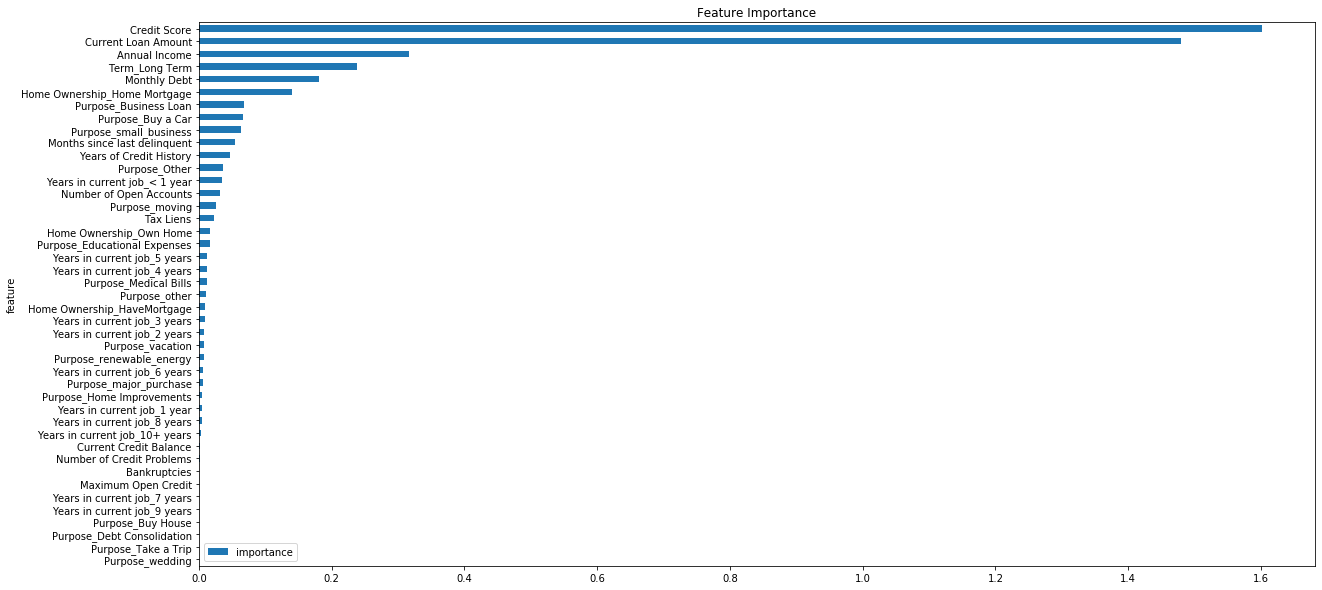

In [96]:
df1 = pd.DataFrame({
    'feature': column_name, 
    'importance': abs(logistic_fitted.coef_[0])})
df1 = df1.sort_values('importance')

# plotting
ax = df1.plot(kind='barh', x='feature', y='importance', 
              title="Feature Importance", figsize=(20,10))
plt.show()

- Based on the feature importance graph above, we know that the most importance features are Credit Score, Current Loan Amount, Annual Income, Term(Long term), Monthly debt, Home Ownership(Home Mortgate), etc. (the remaining are not so significant features compared with the abovementioned features)

> Decision Tree

In [80]:
%%time
'''
# this shows the iterative process of hyperparamter grid search
dt = {'max_depth':[3, 5, 7, 9],
      'criterion':['gini', 'entropy'],
      'min_samples_leaf':[20,40,60,80,100]}
Training accuracy: 0.8493096956385315
Test accuracy: 0.8491809279765717
AUROC score: 0.6358070266469411
'''
dt = {'max_depth':[10, 20, 30, 40, 50],
      'criterion':['gini', 'entropy'],
      'min_samples_leaf':[50,60, 70, 80,90, 100]}


decision_tree = DecisionTreeClassifier(random_state=23)

decision_tree_fitted = Grid_Search(X_train, y_train, decision_tree, dt)

accuracy_train_dt, accuracy_test_dt, auroc_dt = evaluation_metrics(X_train, X_test, y_train, y_test, decision_tree_fitted)

Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=80,
                       random_state=23)
Training accuracy: 0.8493096956385315
Test accuracy: 0.8491809279765717
AUROC score: 0.6358070266469411
Confusion matrix:
 [[8665   27]
 [1621  614]]
------------------------------------------------------------
Wall time: 49.5 s


- Previous result: training accuracy: 1; test accuracy: 0.787682; AUROC: 0.665288.
- The hyperparameter grid search really reduces the overfitting of the model by reducing the training accuracy and increasing the test accuracy, but the AUROC score also decreases around 0.03.

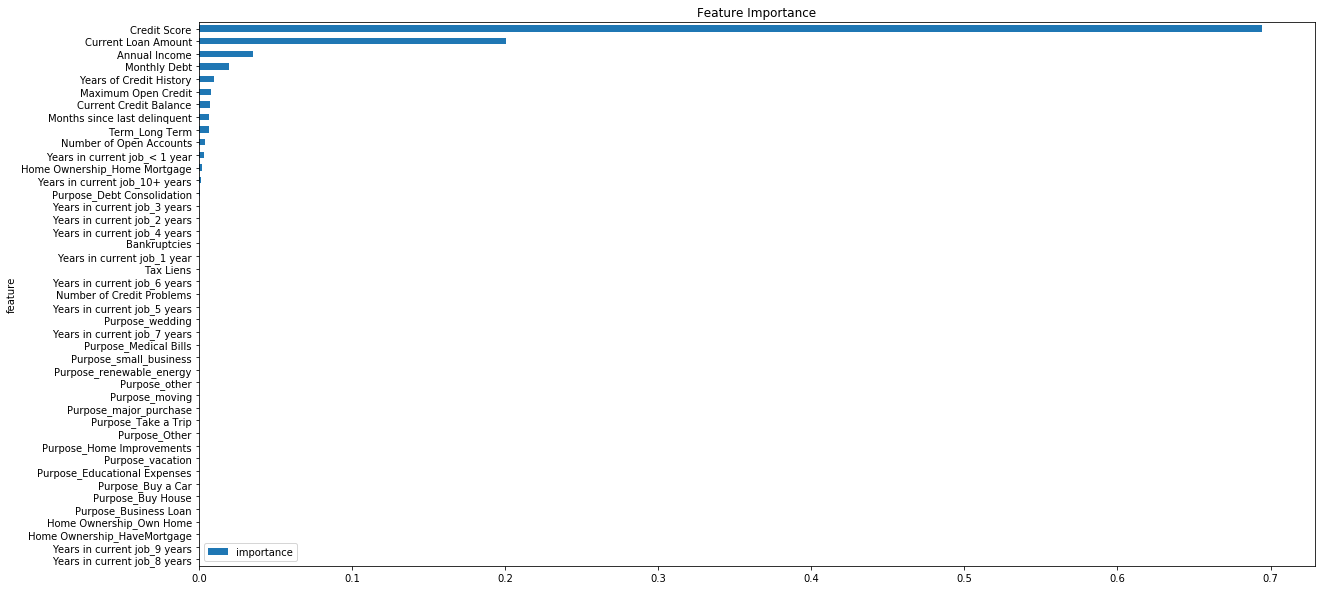

In [97]:
df2 = pd.DataFrame({
    'feature': column_name, 
    'importance': decision_tree_fitted.feature_importances_})
df2 = df2.sort_values('importance')

# plotting
ax = df2.plot(kind='barh', x='feature', y='importance', 
              title="Feature Importance", figsize=(20,10))
plt.show()

- Based on the feature importance graph above, we know that the most importance features are Credit Score, Current Loan Amount, Annual Income,and monthly debt. (the remaining are not so significant features compared with the abovementioned features)

# 6. Result and Conclusion

## 6.1 Research question related
- By doing the EDA and modeling, we answered the research successfully. During the process, we deal with the missing value and information leakage, and try to find the best way to fill in these missings and get the well predicted model.

- After all theimputation methods and modeling, the logistic regression & decision tree provide a better model performance compared with others. The model accuracies for thses two are around 80%, and the AUROC around 65%, which is a little bit lower than our expectations, but that's the best result we can get for current stage. If we have enough time, we probably going to try multiple ways to test the data, and hyper-parameter tuning, and try to increase our model accuracy and auroc score, lower the error at the same time. And connect with our real-life, I believe our model could provide a great help to loan analysts.

## 6.2 Discussion
- Based on the above result, we believe the logistic regression or decision tree provide better model performance, no matter in AUROC score or solving model overfitting. 
- If we have more time, we will:
    - 1) come up with a "new" dataset, with missing value fixed or imputation. We believe the good quality of data really has a great impact on the model performance.
    - 2) perform a much detailed hyperparameter grid search on more models with the help of much advanced computational power, as well as performing KPCA. These are the key step to avoid model overfitting.

# 7. Reference
1. https://jamesrledoux.com/code/imputation#:~:text=One%20approach%20to%20imputing%20categorical,given%20in%20Pandas'%20value_counts%20function.
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/#:~:text=Missing%20data%20are%20a%20common,method%20of%20addressing%20missing%20data. 
3. https://stats.stackexchange.com/questions/421545/multiple-imputation-by-chained-equations-mice-explained
4. https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance/40687862
5. https://stats.stackexchange.com/questions/348574/memoryerror-for-scikitlearn-kernel-pca
6. https://mlwhiz.com/blog/2019/08/07/feature_selection/
7. https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
8. https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
9. https://stackoverflow.com/questions/63847646/svm-takes-long-time-for-hyperparameter-tuning
10. https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
11. https://machinelearningmastery.com/introduction-to-bayesian-belief-networks/
12. https://machinelearningmastery.com/calculate-feature-importance-with-python/